In [ ]:
!pip install ucimlrepo
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Load the Zoo Animal Classification dataset
from ucimlrepo import fetch_ucirepo
zoo = fetch_ucirepo(id=111)

# Data (as pandas dataframes)
X = zoo.data.features
y = zoo.data.targets

## A bit of infos using the metadata of the dataset

In [ ]:
# Metadata
print(zoo.metadata)

# Variable information
print(zoo.variables)

{'uci_id': 111, 'name': 'Zoo', 'repository_url': 'https://archive.ics.uci.edu/dataset/111/zoo', 'data_url': 'https://archive.ics.uci.edu/static/public/111/data.csv', 'abstract': 'Artificial, 7 classes of animals', 'area': 'Life Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 101, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': [], 'target_col': ['type'], 'index_col': ['animal_name'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1990, 'last_updated': 'Fri Sep 15 2023', 'dataset_doi': '10.24432/C5R59V', 'creators': ['Richard Forsyth'], 'intro_paper': None, 'additional_info': {'summary': 'A simple database containing 17 Boolean-valued attributes.  The "type" attribute appears to be the class attribute.  Here is a breakdown of which animals are in which type: (I find it unusual that there are 2 instances of "frog" and one of "girl"!)', 'purpose': None, 'funded_by': None, 

**Analysis:** The "Zoo" dataset is a multivariate dataset with 101 instances and 16 features, including both binary and categorical attributes. It is designed for classification tasks and contains seven classes representing different types of animals. To explore its structure, one can analyze the class distribution, compute descriptive statistics for each feature, and visualize the data. The "type" feature serves as the target variable, allowing for classification based on the characteristics of the animals. This dataset provides a valuable resource for classification and pattern recognition tasks in the field of life science.

In [ ]:
# Access the data and metadata from the loaded Zoo dataset
X = zoo.data.features
y = zoo.data.targets

# Class Distribution
class_distribution = y.value_counts()
print("Class Distribution:")
print(class_distribution)

# Descriptive Statistics
descriptive_stats = X.describe()
print("\nDescriptive Statistics:")
print(descriptive_stats)






Class Distribution:
type
1       41
2       20
4       13
7       10
6        8
3        5
5        4
dtype: int64

Descriptive Statistics:
             hair    feathers        eggs        milk    airborne     aquatic  \
count  101.000000  101.000000  101.000000  101.000000  101.000000  101.000000   
mean     0.425743    0.198020    0.584158    0.405941    0.237624    0.356436   
std      0.496921    0.400495    0.495325    0.493522    0.427750    0.481335   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    1.000000    0.000000    0.000000    0.000000   
75%      1.000000    0.000000    1.000000    1.000000    0.000000    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

         predator     toothed    backbone    breathes    venomous        fins  \
count  101.000000  101.000000  101.000000  101.00

##PCA

In [ ]:
# Step 3: Dimensionality Reduction with PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA for visualization in 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

##K-Means Clustering

In [ ]:
# Step 4: Apply K-Means Clustering
# Determine the optimal number of clusters using the Elbow Method and Silhouette Score.
cluster_range = range(2, 11)
inertia_values = []
silhouette_scores = []

for num_clusters in cluster_range:
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_)  # Inertia measures within-cluster variance
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(X_scaled, labels)
    silhouette_scores.append(silhouette_avg)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

##Visualization

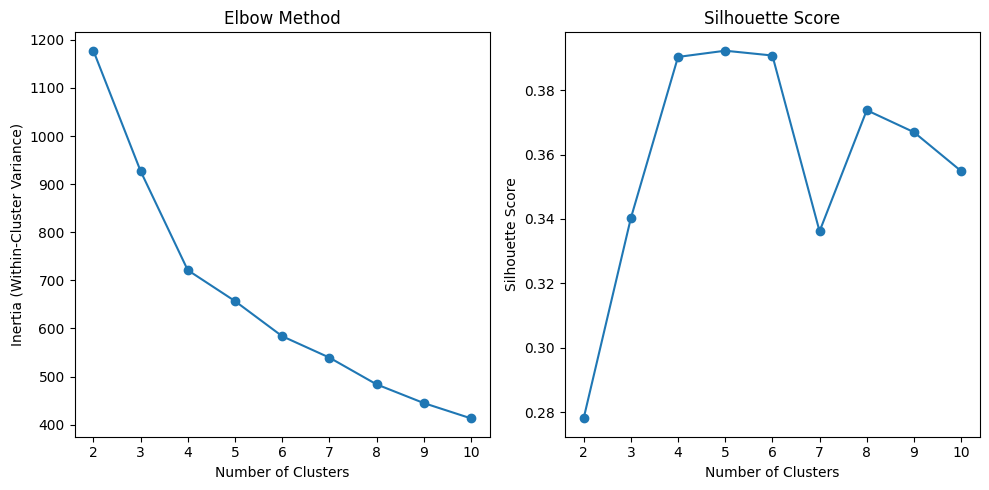

In [ ]:
# Visualize the Elbow Method
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(cluster_range, inertia_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Within-Cluster Variance)')
plt.title('Elbow Method')

# Visualize the Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')

plt.tight_layout()
plt.show()

In [ ]:
# Step 5: Optimal Number of Clusters
best_num_clusters = cluster_range[np.argmin(inertia_values)]
print(f'Optimal Number of Clusters (Elbow Method): {best_num_clusters}')

# Step 6: Apply K-Means with Optimal Clusters
kmeans = KMeans(n_clusters=best_num_clusters, random_state=0)
kmeans.fit(X_scaled)
cluster_labels = kmeans.labels_

Optimal Number of Clusters (Elbow Method): 10


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


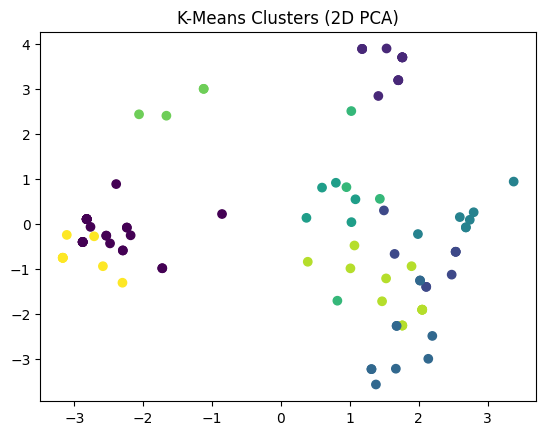

In [ ]:
# Step 7: Visualize Clusters in 2D
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis')
plt.title("K-Means Clusters (2D PCA)")
plt.show()

In [ ]:
# Step 8: Evaluate Cluster Quality
silhouette_avg = silhouette_score(X_scaled, cluster_labels)
print(f'Silhouette Score (Best Clustering): {silhouette_avg}')

Silhouette Score (Best Clustering): 0.3548915152803662


7. The objective of unsupervised learning is to identify patterns or structures within data without the need for labeled outcomes, in contrast to supervised learning where the goal is to predict or classify based on known labels.

8. To choose the optimal number of clusters (k) for K-Means, one can use techniques like the Elbow Method, Silhouette Score, or Gap Statistics, where the value of k that optimizes cluster quality should be selected.

9. Standardizing features in unsupervised learning ensures that variables with different units or scales contribute equally to the clustering process, promoting fair comparisons among features.

10. K-Means advantages include its simplicity, efficiency, and scalability, while its limitations involve sensitivity to initial cluster centers, dependence on the number of clusters specified, and the assumption of spherical clusters.

11. Cluster quality can be evaluated by measures like the Silhouette Score, Davies-Bouldin Index, or the Inertia (within-cluster sum of squares). These metrics assess the cohesion and separation of clusters, helping to determine the effectiveness of the clustering algorithm.